In [535]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [536]:
gender = pd.read_csv('gender_submission[1].csv')
test=pd.read_csv('test[1].csv')
train=pd.read_csv('train[1].csv')

In [537]:
gender.head(3)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0


In [538]:
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [539]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [540]:
test=pd.merge(test,gender, how = 'inner' , on = 'PassengerId')
test.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0


In [541]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [542]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [543]:
#test = test.drop(['Survived_x', 'Survived_y'], axis = 1)


In [544]:
test.shape

(418, 12)

In [545]:
df = pd.concat([train, test], join = 'inner')

In [546]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [547]:
#chossing only categorical variable 

cat_var = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes == 'object']


In [548]:
missing_value_col = [col for col in df.columns if df[col].isnull().any()]

In [549]:
missing_value_col

['Age', 'Fare', 'Cabin', 'Embarked']

In [550]:
cat_var

['Sex', 'Embarked']

In [551]:
numeric_variable = [col for col in df.columns if df[col].dtypes in ['int32', 'int64', 'float64']]

In [552]:
numeric_variable

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [553]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     1309 non-null   int64  
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 132.9+ KB


In [554]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [555]:
train.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [556]:
#train=train.drop(['PassengerId', 'Cabin' , 'Ticket'], axis = 1)
#test = test.drop(['PassengerId', 'Cabin' , 'Ticket'], axis = 1)

In [557]:
print(train.shape)
#print(test.shape)

(891, 12)


In [558]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [559]:
train.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [560]:
train.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [561]:
train.Fare.nunique()

248

In [562]:
test.Name

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [563]:
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [564]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [565]:
df_knn_train = train.filter(['Age'],axis = 1).copy()
df_knn_test = test.filter(['Age'],axis = 1).copy()
df_knn.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [566]:
scaler = StandardScaler()
df_knn_train = pd.DataFrame(scaler.fit_transform(df_knn_train), columns = df_knn_train.columns)
df_knn_test = pd.DataFrame(scaler.transform(df_knn_test), columns = df_knn_test.columns)

In [567]:
knn_imputer = KNNImputer(n_neighbors=5, weights = 'uniform', metric = 'nan_euclidean')
dff_knn_train_final = pd.DataFrame(knn_imputer.fit_transform(df_knn_train), columns =df_knn_train.columns )
dff_knn_test_final = pd.DataFrame(knn_imputer.fit_transform(df_knn_test), columns =df_knn_test.columns )

In [568]:
dff_knn_train_final['Age']=dff_knn_train_final['Age']*100
dff_knn_test_final['Age']=dff_knn_test_final['Age']*100

In [569]:
dff_knn_train_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [570]:
train['Age']=dff_knn_train_final['Age']
test['Age']=dff_knn_test_final['Age']

In [571]:
for i in range(891):
    if(train.at[i,"Cabin"]!=0):
        train.at[i,"Cabin"]=1
            
for i in range(418):
    if(test.at[i,"Cabin"]!=0):
        test.at[i,"Cabin"]=1
   

In [572]:
train['Cabin'].unique()

array([1], dtype=object)

In [573]:
train['Cabin'].isnull().sum()

0

In [574]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [575]:
emb = pd.get_dummies(train['Embarked'])
emb1 = pd.get_dummies(test['Embarked'])

In [576]:
train['C'] = emb['C']
train['Q'] = emb['Q']
train['S']= emb['S']
test['C']= emb1['C']
test['Q']= emb1['Q']
test['S']= emb1['S']

In [577]:
train['Sex']=train['Sex'].map({'male' : 0, 'female' : 1})

In [578]:
test['Sex']=test['Sex'].map({'male' : 0, 'female' : 1})

In [579]:
train= train.drop(['Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1)
test= test.drop(['Embarked', 'Name', 'Ticket', 'PassengerId'], axis = 1)

In [580]:
train['Cabin'] = train['Cabin']._convert(numeric=True)
test['Cabin']=test['Cabin']._convert(numeric=True)

In [581]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int64  
 8   C         891 non-null    uint8  
 9   Q         891 non-null    uint8  
 10  S         891 non-null    uint8  
dtypes: float64(2), int64(6), uint8(3)
memory usage: 58.4 KB


In [582]:
train['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [583]:
train['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [584]:
train['Family']= train['SibSp']+train['Parch']+1
test['Family']= test['SibSp']+test['Parch']+1

In [585]:
train = train.drop(['SibSp','Parch'], axis = 1)
test = test.drop(['SibSp','Parch'], axis = 1)

In [586]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Cabin       0
C           0
Q           0
S           0
Family      0
dtype: int64

In [587]:
df1=pd.concat([train,test], join = 'inner') 

In [588]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1309 non-null   int64  
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   int64  
 3   Age       1309 non-null   float64
 4   Fare      1308 non-null   float64
 5   Cabin     1309 non-null   int64  
 6   C         1309 non-null   uint8  
 7   Q         1309 non-null   uint8  
 8   S         1309 non-null   uint8  
 9   Family    1309 non-null   int64  
dtypes: float64(2), int64(5), uint8(3)
memory usage: 85.6 KB


In [589]:
from sklearn.model_selection import train_test_split

In [590]:
X = df1.drop('Survived', axis = 1)
X.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'C', 'Q', 'S', 'Family'], dtype='object')

In [591]:
y = df1['Survived']

In [592]:
X_trainee = train[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'C', 'Q', 'S','Family']]
X_testee = test[['Pclass', 'Sex', 'Age', 'Fare', 'Cabin', 'C', 'Q', 'S', 'Family']]
y = train[['Survived']]

In [593]:
pd.DataFrame(X_testee).isnull().sum()

Pclass    0
Sex       0
Age       0
Fare      1
Cabin     0
C         0
Q         0
S         0
Family    0
dtype: int64

In [594]:
X_testee = pd.DataFrame(X_testee).fillna(method='ffill')

In [595]:
X_trainee = scaler.fit_transform(X_trainee)
X_testee = scaler.transform(X_testee)

In [596]:
X_train,X_test, y_train, y_test = train_test_split(X_trainee, y , train_size=0.9, random_state=1)

In [597]:
X_train.shape

(801, 9)

In [598]:
X_test.shape

(90, 9)

### KNN neighbour

In [599]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
acc=[]

for i in range(1,20):
    knn_1 = KNeighborsClassifier(n_neighbors=i)
    knn_1.fit(X_train,y_train.values.ravel())
    y_pred = knn_1.predict(X_test)
    acc.append(accuracy_score(y_test,y_pred))
    print('For k = ',i,":", accuracy_score(y_test,y_pred))

For k =  1 : 0.7
For k =  2 : 0.7222222222222222
For k =  3 : 0.7666666666666667
For k =  4 : 0.6888888888888889
For k =  5 : 0.7111111111111111
For k =  6 : 0.7333333333333333
For k =  7 : 0.7111111111111111
For k =  8 : 0.7333333333333333
For k =  9 : 0.7444444444444445
For k =  10 : 0.7555555555555555
For k =  11 : 0.7333333333333333
For k =  12 : 0.7111111111111111
For k =  13 : 0.7222222222222222
For k =  14 : 0.7222222222222222
For k =  15 : 0.7111111111111111
For k =  16 : 0.7444444444444445
For k =  17 : 0.7333333333333333
For k =  18 : 0.7444444444444445
For k =  19 : 0.7444444444444445


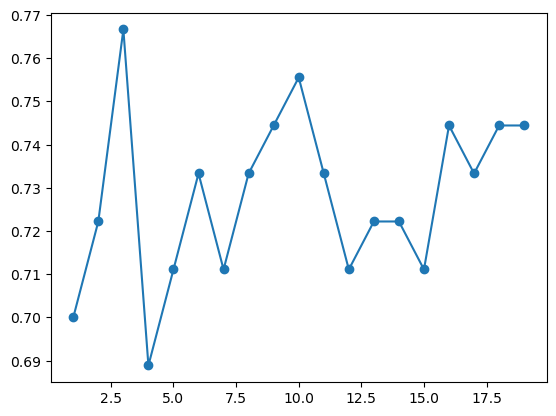

In [600]:
plt.plot(range(1,20,1),acc,marker = 'o')

In [601]:
knn_final = KNeighborsClassifier(n_neighbors=3)
knn_final.fit(X_train,y_train.values.ravel())
y_pred = knn_final.predict(X_testee)
#y_pred = pd.DataFrame(y_pred)
test_info = pd.read_csv('test[1].csv')
test_info.head()
New_DF= pd.DataFrame()

In [602]:
X_testee
New_DF= pd.DataFrame()
New_DF['PassengerId'] = test_info['PassengerId']
New_DF['Survived_KNN']= y_pred

In [603]:
New_DF.head()

,PassengerId,Survived_KNN
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0


In [604]:
depth = []

from sklearn.tree import DecisionTreeClassifier

for i in range(1,14):
    dt = DecisionTreeClassifier(criterion='entropy', random_state=100, max_depth=i)
    dt.fit(X_train,y_train)
    y_hat = dt.predict(X_test)
    depth.append(accuracy_score(y_test,y_hat))
    print("The accuracy score", i, accuracy_score(y_test,y_hat))

The accuracy score 1 0.7333333333333333
The accuracy score 2 0.7222222222222222
The accuracy score 3 0.7666666666666667
The accuracy score 4 0.7666666666666667
The accuracy score 5 0.7666666666666667
The accuracy score 6 0.7888888888888889
The accuracy score 7 0.7777777777777778
The accuracy score 8 0.7666666666666667
The accuracy score 9 0.7666666666666667
The accuracy score 10 0.7888888888888889
The accuracy score 11 0.7888888888888889
The accuracy score 12 0.7888888888888889
The accuracy score 13 0.7555555555555555


In [605]:
depth

[0.7333333333333333,
 0.7222222222222222,
 0.7666666666666667,
 0.7666666666666667,
 0.7666666666666667,
 0.7888888888888889,
 0.7777777777777778,
 0.7666666666666667,
 0.7666666666666667,
 0.7888888888888889,
 0.7888888888888889,
 0.7888888888888889,
 0.7555555555555555]

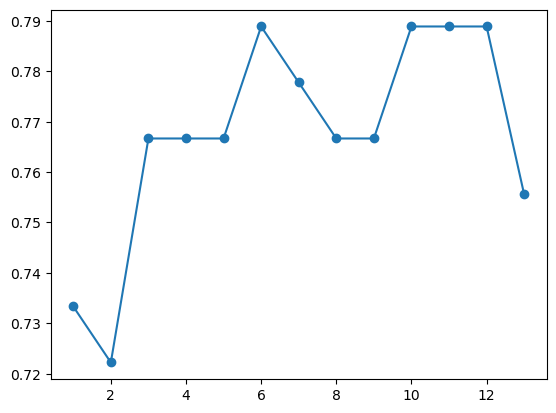

In [606]:
plt.plot(range(1,14), depth ,marker = 'o')
#plt.plot(range(1,13), depth, color = 'red', marker = 'o')

In [607]:
#actual model development 
dt_final = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=42)
dt_final.fit(X_train,y_train)
y_hat_final = dt_final.predict(X_testee)
dt_tree=pd.DataFrame()
dt_tree['PassengerId']=test_info['PassengerId']
dt_tree['Survived']=y_hat_final
dt_tree.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [622]:
import pickle
pickle.dump(dt_final, open('dtmodel.pkl','wb'))

In [623]:
pickled_model=pickle.load(open('dtmodel.pkl','rb'))

In [631]:
pickled_model.predict(X_testee[15].reshape(1,-1))

array([1], dtype=int64)